In [2]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")


___
Enter Team Member Names here (double click to edit):

- Harry Bhasin
- Oscar Padilla
- Najeeb Syed

In [3]:
%watermark -u -d -v -p numpy,pandas,matplotlib,sklearn

ERROR:root:Line magic function `%watermark` not found.


________
<a id="top"></a>
# Live Session Assignment Two
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (.ipynb file, remember to save it!!) or HTML of the rendered notebook before the end of class.

## Contents
* <a href="#Loading">Loading the Classification Data</a>
* <a href="#using_trees">Using Decision Trees - Gini</a>

**These contents will become available during the live session: **
* <a href="#entropy">Using Decision Trees - Entropy</a>
* <a href="#multi">Multi-way Splits</a>
* <a href="#sklearn">Decision Trees in Scikit-Learn</a>

________________________________________________________________________________________________________
<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Classification Data
Please run the following code to read in the "digits" dataset from sklearn's data loading module. This is identical to the first in class assignment for loading the data into matrices. `ds.data` is a matrix of feature values and `ds.target` is a column vector of the class output (in our case, the hand written digit we want to classify). Each class is a number (0 through 9) that we want to classify as one of ten hand written digits. 



In [4]:
from sklearn.datasets import load_digits
import numpy as np
from __future__ import print_function

ds = load_digits()

# this holds the continuous feature data
print('features shape:', ds.data.shape) # there are 1797 instances and 64 features per instance
print('target shape:', ds.target.shape )
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (1797L, 64L)
target shape: (1797L,)
range of target: 0 9


________________________________________________________________________________________________________
<a id="using_trees"></a>
<a href="#top">Back to Top</a>
## Using Decision Trees
In the videos, we talked about the splitting conditions for different attributes. Specifically, we discussed the number of ways in which it is possible to split a node, depending on the attribute types. To understand the possible splits, we need to understand the attributes. For the question below, you might find the description in the `ds['DESCR']` field to be useful. You can see the field using `print(ds['DESCR'])`

**Question 1:** For the digits dataset, what are the type(s) of the attributes? How many attributes are there? What do they represent?


In [5]:
print(ds['DESCR'])

## 64 attributes (8 x 8) all integers
## ranging from 0 to 16, which
## represent the degree of grey of each pixel
## from 0 = white to 16 = black

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

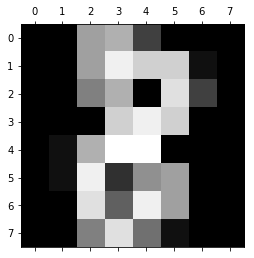

In [6]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(ds.images[28]) 
plt.show() 

___
## Using the gini coefficient
We talked about the gini index in the videos.  The gini coefficient for a **given split** is given by:
$$Gini=\sum_{t=1}^T \frac{n_t}{N}gini(t)$$
where $T$ is the total number of splits (2 for binary attributes), $n_t$ is the number of instances in node $t$ after splitting, and $N$ is the total number of instances in the parent node. $gini(t)$ is the **gini index for each individual node that is created by the split** and is given by:
$$gini(t)=1-\sum_{j=0}^{C-1} p(j|t)^2$$
where $C$ is the total number of possible classes and $p(j|t)$ is the probability of class $j$ in node $t$ (i.e., $n_j==$ the count of instances belonging to class $j$ in node $t$, normalized by the total number of instances in node $t$).
$$ p(j|t) = \frac{n_j}{n_t}$$ 

For the given dataset, $gini(t)$ has been programmed for you in the function `gini_index`. 

* `def gini_index(classes_in_split):`
 * To use the function, pass in a `numpy` array of the class labels for a node as (i.e., pass in the rows from `ds.target` that make up a node in the tree) and the gini will be returned for that node. 


In [7]:
# compute the gini of several examples for the starting dataset
# This function "gini_index" is written for you. Once you run this block, you 
#   will have access to the function for the notebook. You do not need to know 
#   how this function works--only what it returns 
# This function returns the gini index for an array of classes in a node.
def gini_index(classes_in_split):
    # pay no attention to this code in the function-- it just computes the gini for a given split 
    classes_in_split = np.reshape(classes_in_split,(len(classes_in_split),-1))
    unique_classes = np.unique(classes_in_split)
    gini = 1
    for c in unique_classes:
        gini -= (np.sum(classes_in_split==c) / float(len(classes_in_split)))**2
        
    return gini

In the example below, the function is used calculate the gini for splitting the dataset on feature 28, with value 2.5. In this example, we need to create two separate tree nodes: the first node has all the `ds.target` labels when feature 28 is greater than 2.5, the second node has all the rows from `ds.target` where feature 28 is less than 2.5. The steps are outlined below. **Read this carefully to understand what the code does below in the block following this.**
- Feature 28 is saved into a separate variable `feature28 = ds.data[:,28]`
- First all the target classes for the first node are calculated using `numpy` indexing `ds.target[feature28>2.5]` 
 - Note: this grabs all the rows in `ds.target` (the classes) which have feature 28 greater than 2.5 (similar to indexing in pandas)
- Second, those classes are passed into the function to get the gini for the right node in this split (i.e., feature 28 being greater than the threshold 2.5). 
 - `gini_r = gini_index(ds.target[feature28>2.5])`
- Third, the gini is calculated for the left node in the tree. This grabs only the rows in `ds.target` where feature 28 is less than 2.5.
     - `gini_l = gini_index(ds.target[feature28<=2.5])`
- Combining the gini indices is left as an exercise in the next section

In [8]:
#==========================Use the gini_index Example===============
# get the value for this feature as a column vector 
# (this is like grabbing one column of the record table)
feature28 = ds.data[:,28]

# if we split on the value of 2.5, then this is the gini for each resulting node:
gini_gr = gini_index(ds.target[feature28 > 2.5]) # just like in pandas, we are sending in the rows where feature28>2.5
gini_lte = gini_index(ds.target[feature28 <= 2.5]) # and sending the rows where feature28<=2.5

# compute gini example. This splits on attribute '28' with a value of 2.5
print('gini for right node of split:', gini_gr)
print('gini for left node of split:', gini_lte)

gini for right node of split: 0.884585786767
gini for left node of split: 0.711540756654


**Question 2:** Now, using the above values `gini_r` and `gini_l`. Calculate the combined Gini for the entire split. You will need to write the weighted summation (based upon the number of instances inside each node). To count the number of instances greater than a value using numpy, you can use broadcasting, which is a special way of indexing into a numpy array. For example, the code `some_array>5` will return a new numpy array of true/false elements. It is the same size as `some_array` and is marked true where the array is greater than `5`, and false otherwise. By taking the `sum` of this array, we can count how many times `some_array` is greater than `5`. 

`counts = sum(some_array>5)` 
 
You will need to use this syntax to count the values in each node as a result of splitting.  

In [9]:
## Enter your code here
count_gr = sum(feature28 > 2.5)
count_lte = sum(feature28 <= 2.5)
counts = sum(feature28 >= 0)

print('Number of instances greater than 2.5:', count_gr)
print('Number of instances less than 2.5:', count_lte)
print('Total number of instances:', counts)

Gini_Split = ((count_gr * gini_gr) + (count_lte * gini_lte))/counts

## Enter your code here
print('The total gini of the split for a threshold of 2.5 is:', Gini_Split)

Number of instances greater than 2.5: 1398
Number of instances less than 2.5: 399
Total number of instances: 1797
The total gini of the split for a threshold of 2.5 is: 0.846163434505


In [27]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(ds.data, ds.target)
tree.export_graphviz(clf, out_file = 'tree.dot')